<a href="https://colab.research.google.com/github/Ozedim/Ozedim/blob/main/trevor__ogwang__Belt_Exam_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#install joblib
!pip install joblib pandas

In [4]:
!pip install pandas

In [5]:
#libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
# set random seed
SEED = 321
np.random.seed(SEED)

**PART 1**

In [6]:
!pip install "pandas<2.0.0"

**Load the provided joblib file. Display the .keys of the dictionary stored in the joblib file.**

In [7]:
!pip install joblib

In [8]:
import joblib

In [9]:
# Add a new folder to week 13 file structure
import os
os.makedirs('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models',exist_ok=True)



In [10]:
# Confirm creation of new folder
os.listdir('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models')


['Autompg', 'Autompg.joblib']

In [11]:
# Add Autompg subfolder to Models
os.makedirs('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg',exist_ok=True)
# Confirm creation of new folder
os.listdir('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg')



[]

In [12]:
# Load data
data_file = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week16/Data/saved_model.joblib'

# Load the data using the function
data = joblib.load(data_file)
data

{'preprocessor': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d46594e1d50>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(fill_value='MISSING',
                                                                 strategy='constant')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d46594e1f90>)],
                   verbose_feat

In [13]:
#Display keys of the dictionary
print("Keys in the Dictionary:",data.keys())

Keys in the Dictionary: dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])


**Assign each of the keys from the dictionary as a separate variable**

In [14]:
# Loading data and objects as separate variables
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
preprocessor = data['preprocessor']
LinearRegression = data['LinearRegression']
RandomForestRegressor = data['RandomForestRegressor']



In [15]:
## saving variables.
import joblib
## creating a dictionary of all of the variables
export = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForestRegressor':RandomForestRegressor}


In [16]:
# saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(export, '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg.joblib')



['/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg.joblib']

In [17]:
# Confirm the file was saved by loading it back in
loaded = joblib.load('/content/drive/MyDrive/CodingDojo/04-DataViz/Week16/Data/saved_model.joblib')
loaded.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [18]:
# Loading data and objects
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
RandomForestRegressor = loaded['RandomForestRegressor']



**Use the preprocessor to transform the X_train/X_test data into processed dataframes.**

In [19]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed
X_test_processed

array([[1.3860e+04, 7.5000e+01, 7.0000e+00, ..., 9.0000e+00, 1.0000e+00,
        1.0000e+00],
       [8.4050e+03, 5.0000e+01, 8.0000e+00, ..., 7.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.1310e+04, 7.5000e+01, 5.0000e+00, ..., 5.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [4.7007e+04, 1.2300e+02, 7.0000e+00, ..., 1.1000e+01, 1.0000e+00,
        1.0000e+00],
       [1.0800e+04, 6.0000e+01, 7.0000e+00, ..., 7.0000e+00, 1.0000e+00,
        1.0000e+00],
       [5.1900e+03, 5.0000e+01, 5.0000e+00, ..., 5.0000e+00, 1.0000e+00,
        1.0000e+00]])

**Replace the column names with the correct feature names extracted from the preprocessor**

In [20]:
X_train.columns = preprocessor.get_feature_names_out()
X_test.columns = preprocessor.get_feature_names_out()
X_train
X_test

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Central Air_Y,Street_Pave
343,13860,75.0,7,1952.0,Y,2704,9,Pave
1413,8405,50.0,8,861.0,Y,1367,7,Pave
2583,11310,75.0,5,1367.0,Y,1375,5,Pave
2020,6180,60.0,5,960.0,N,986,5,Pave
348,8530,NaN,5,384.0,Y,1474,7,Pave
...,...,...,...,...,...,...,...,...
2223,25485,NaN,4,1560.0,Y,1560,6,Pave
1922,11988,90.0,6,1244.0,Y,1244,6,Pave
1497,47007,123.0,7,0.0,Y,3820,11,Pave
656,10800,60.0,7,676.0,Y,1352,7,Pave


**Extract the coefficients and save them as a Series with the correct feature names as the index**

In [21]:
#Extract the coefficients and save them as a Series with the correct feature names as the index.
LinearRegression.coef_

array([ 1.10428754e-01,  8.79663271e+01,  1.41612957e+01,  6.07389601e+01,
        1.03864442e+02, -7.38974003e+03,  3.42004104e+04, -3.04921243e+04])

In [22]:
import pandas as pd
coefficients = [1.10428754e-01, 8.79663271e+01, 1.41612957e+01, 6.07389601e+01, 1.03864442e+02, -7.38974003e+03, 3.42004104e+04, -3.04921243e+04]

# Create a Series with coefficients
coefficients_series = pd.Series(coefficients)

# Print or use the coefficients Series
print(coefficients_series)

0        0.110429
1       87.966327
2       14.161296
3       60.738960
4      103.864442
5    -7389.740030
6    34200.410400
7   -30492.124300
dtype: float64


In [23]:
#Change the pandas option for float format to display the coefficients with pandas in a readable comma separator for thousands and 2 decimal places.
pd.options.display.float_format = '{:,.2f}'.format
coefficients_series

0         0.11
1        87.97
2        14.16
3        60.74
4       103.86
5    -7,389.74
6    34,200.41
7   -30,492.12
dtype: float64

In [24]:
#Extract and create a bar graph of the feature importances, sorted from largest to smallest.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

sorted_feature_importances = RandomForestRegressor.feature_importances_
sorted_feature_names = X_train.columns

# Sort the feature importances and feature names together
sorted_indices = np.argsort(sorted_feature_importances)[::-1]
sorted_feature_importances = sorted_feature_importances[sorted_indices]

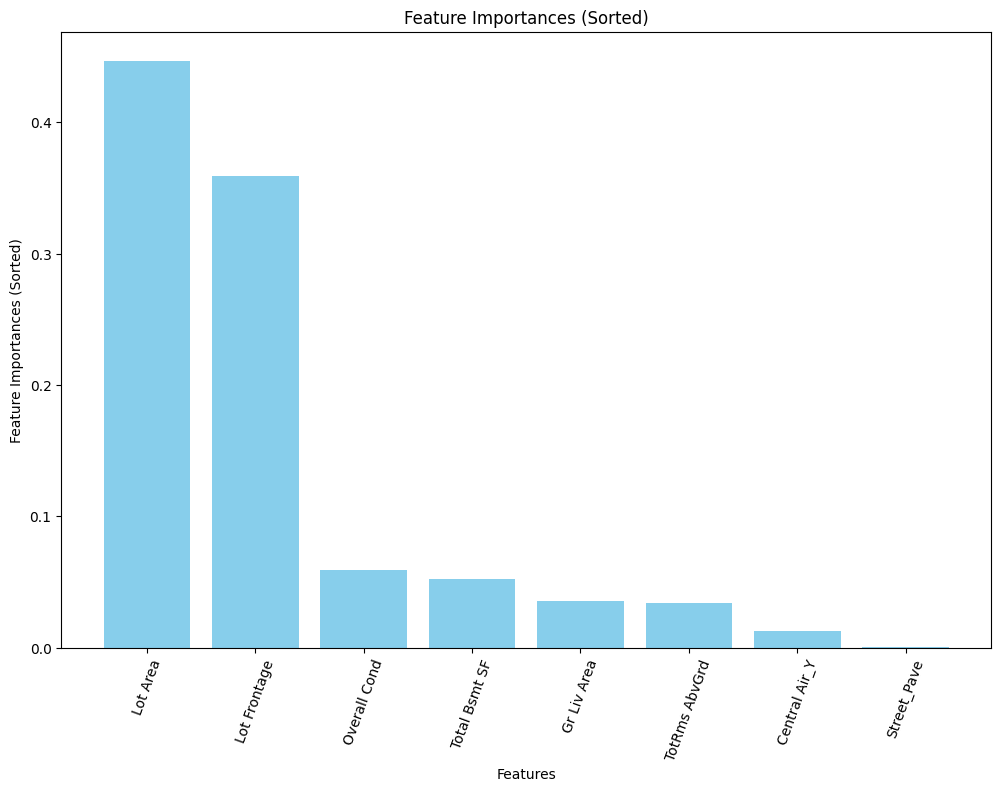

In [25]:
#sort the coefficeints by magnitude
sorted_feature_importances = np.abs(sorted_feature_importances)
# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Features')
# Changed the ylabel variable name to avoid conflict
plt.ylabel('Feature Importances (Sorted)')
plt.title('Feature Importances (Sorted)')
plt.xticks(rotation=70)
plt.show()

In [26]:
#What are the top 4 most important features?
top_4_features = sorted_feature_names[:4]
top_4_features

Index(['Lot Area', 'Lot Frontage', 'Overall Cond', 'Total Bsmt SF'], dtype='object')

In [27]:
#Of the top 4 most important features, identify which of these features also appeared in the 4 largest positive or 2 largest negative coefficients.
four_largest = coefficients_series.nlargest(4)
four_largest

6   34,200.41
4      103.86
1       87.97
3       60.74
dtype: float64

In [28]:
!pip install shap
import shap

In [29]:
#Apply Shap to Explain the Random Forest Model
shap_values = shap.TreeExplainer(RandomForestRegressor).shap_values(X_train_processed)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [-2.53328104e+03, -8.59174751e+03,  1.56986508e+03, ...,
         7.46540789e+02,  1.42280489e+03,  1.94301039e+01],
       [-1.61177112e+03,  1.25997349e+03,  6.80557709e+02, ...,
         8.63799268e+02,  1.75197910e+03,  6.79061972e+01],
       [-1.14226838e+03, -1.36346517e+03,  1.65453146e+03, ...,
         9.64277083e+02,  2.08409374e+03,  1.30955576e+02]])

In [30]:
#Sample 500 rows of the processed X_train data as X_shap, using random_state=321
X_shap = X_train_processed[:500]
X_shap

array([[1.62690000e+04, 6.92306849e+01, 5.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.38910000e+04, 1.07000000e+02, 5.00000000e+00, ...,
        6.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.90000000e+03, 6.92306849e+01, 4.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.46010000e+04, 8.50000000e+01, 5.00000000e+00, ...,
        8.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.58100000e+04, 5.90000000e+01, 5.00000000e+00, ...,
        7.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.50000000e+03, 6.30000000e+01, 5.00000000e+00, ...,
        6.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [31]:
#Save the corresponding y_train values as y_shap
y_shap = y_train[:500]
y_shap

853     140000
1055    372402
2483    107000
2351    179900
1700    418000
         ...  
2137    134900
1588    209200
967     315000
1727    181755
534     152000
Name: SalePrice, Length: 500, dtype: int64

In [32]:
#Create a shap model explainer for the random forest model
shap_explainer = shap.TreeExplainer(RandomForestRegressor)
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [ 1.32021730e+04,  3.19404871e+03,  3.90404029e+03, ...,
        -2.34065312e+03,  1.56775049e+03,  1.82525488e+01],
       [ 8.01264523e+03, -1.65601039e+03,  4.80796101e+03, ...,
         1.16500946e+02,  1.99195931e+03,  5.01981063e+01],
       [-1.24667459e+03,  4.57401356e+02,  1.91706988e+03, ...,
         6.84586429e+02,  1.80481749e+03,  2.88628720e+01]])

In [33]:
#Calculate the shap values for the sampled data
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [ 1.32021730e+04,  3.19404871e+03,  3.90404029e+03, ...,
        -2.34065312e+03,  1.56775049e+03,  1.82525488e+01],
       [ 8.01264523e+03, -1.65601039e+03,  4.80796101e+03, ...,
         1.16500946e+02,  1.99195931e+03,  5.01981063e+01],
       [-1.24667459e+03,  4.57401356e+02,  1.91706988e+03, ...,
         6.84586429e+02,  1.80481749e+03,  2.88628720e+01]])

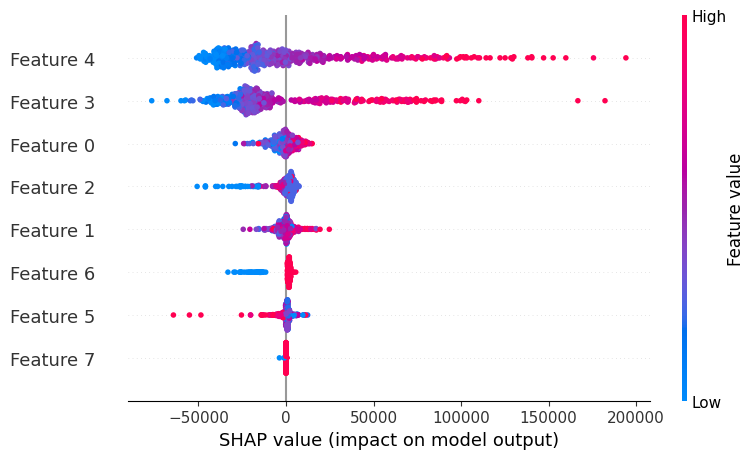

In [34]:
#Create a summary plot (plot_type=’dot’) of the most important features, according to shap.
shap.summary_plot(shap_values, X_shap, plot_type='dot')

Interpret the top 6 most important features. According to shap, what effect does each feature have on the model’s prediction?

#Part 2

Load the provided csv, located in the zip file you downloaded in Part 1

In [35]:
data='/content/drive/MyDrive/CodingDojo/04-DataViz/Week16/Data/zillow_home_values-zipcode.csv'
df=pd.read_csv(data)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"


Prepare the data as a time series DataFrame:

In [36]:
# Read the data from the CSV file
df = pd.read_csv(data)

# Prepare the data as a time series DataFrame
df = pd.DataFrame(df)

# Print the DataFrame
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"


In [37]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '31012000',
       ...
       '28022022', '31032022', '30042022', '31052022', '30062022', '31072022',
       '31082022', '30092022', '31102022', '30112022'],
      dtype='object', length=284)

In [38]:
#Prepare the data as a time series DataFrame
new_df = pd.DataFrame(df)
new_df.drop(columns=['RegionID'], inplace=True)
new_df

,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,29022000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00","107,274.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00","222,885.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00","90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00","190,588.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00","277,855.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27437,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,NaN,NaN,...,"179,118.00","180,140.00","181,125.00","182,326.00","184,931.00","186,807.00","188,354.00","190,188.00","191,768.00","193,591.00"
27438,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,NaN,NaN,...,"358,872.00","364,462.00","370,884.00","374,839.00","375,156.00","374,141.00","372,143.00","371,578.00","372,879.00","376,523.00"
27439,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"110,082.00"
27440,30657,51009,zip,IA,IA,Calumet,NaN,O Brien County,NaN,NaN,...,"72,574.00","73,121.00","73,348.00","73,553.00","74,544.00","75,369.00","75,727.00","75,402.00","75,650.00","75,810.00"


In [39]:
# Drop the columns that are not date columns
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
date_columns = new_df.columns.difference(non_date_columns)
date_columns

Index(['28022001', '28022002', '28022003', '28022005', '28022006', '28022007',
       '28022009', '28022010', '28022011', '28022013',
       ...
       '31122012', '31122013', '31122014', '31122015', '31122016', '31122017',
       '31122018', '31122019', '31122020', '31122021'],
      dtype='object', length=275)

In [40]:
#Melt the wide-form data into a long-form time series
# Melt the DataFrame
melted = pd.melt(df, id_vars=non_date_columns, value_vars=date_columns, var_name='date', value_name='Value')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,28022001,"109,045.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,28022001,"226,052.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,28022001,"87,845.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"220,488.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"302,885.00"
...,...,...,...,...,...,...,...,...,...,...,...
7546545,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,31122021,"171,162.00"
7546546,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,31122021,"355,540.00"
7546547,82217,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,31122021,NaN
7546548,80581,30657,51009,zip,IA,IA,Calumet,NaN,O Brien County,31122021,"71,242.00"


In [41]:
#The date column should be named “Date”
melted.rename(columns={'date': 'Date'}, inplace=True)
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,28022001,"109,045.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,28022001,"226,052.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,28022001,"87,845.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"220,488.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"302,885.00"
...,...,...,...,...,...,...,...,...,...,...,...
7546545,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,31122021,"171,162.00"
7546546,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,31122021,"355,540.00"
7546547,82217,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,31122021,NaN
7546548,80581,30657,51009,zip,IA,IA,Calumet,NaN,O Brien County,31122021,"71,242.00"


In [42]:
# Convert the 'Date' column to a datetime datatype
# Convert the 'Date' column to datetime format
melted['Date'] = pd.to_datetime(melted['Date'], format='%d%m%Y')

# Format the 'Date' column using strftime
melted['Formatted Date'] = melted['Date'].dt.strftime("%m/%d/%Y")
melted['Formatted Date']

0          02/28/2001
1          02/28/2001
2          02/28/2001
3          02/28/2001
4          02/28/2001
              ...    
7546545    12/31/2021
7546546    12/31/2021
7546547    12/31/2021
7546548    12/31/2021
7546549    12/31/2021
Name: Formatted Date, Length: 7546550, dtype: object

In [43]:
#set Date as the Index
melted = melted.set_index('Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Value,Formatted Date
Date,,,,,,,,,,,
2001-02-28,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,045.00",02/28/2001
2001-02-28,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"226,052.00",02/28/2001
2001-02-28,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"87,845.00",02/28/2001
2001-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"220,488.00",02/28/2001
2001-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"302,885.00",02/28/2001
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,"171,162.00",12/31/2021
2021-12-31,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,"355,540.00",12/31/2021
2021-12-31,82217,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,NaN,12/31/2021


In [44]:
#Keep data from the following states:  MA, PA, NY, NJ, MD
filtered_data = melted.loc[melted['State'].isin(['MA', 'PA', 'NY', 'NJ', 'MD'])]
filtered_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Value,Formatted Date
Date,,,,,,,,,,,
2001-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"220,488.00",02/28/2001
2001-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"302,885.00",02/28/2001
2001-02-28,61148,10,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,"183,685.00",02/28/2001
2001-02-28,62046,11,11236,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,"234,900.00",02/28/2001
2001-02-28,62019,14,11208,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,"216,884.00",02/28/2001
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,62607,30657,12489,zip,NY,NY,Wawarsing,"Kingston, NY",Ulster County,"228,650.00",12/31/2021
2021-12-31,64515,30657,16245,zip,PA,PA,Oak Ridge,"Pittsburgh, PA",Armstrong County,"71,486.00",12/31/2021
2021-12-31,65172,30657,17762,zip,PA,PA,Hughesville,"Williamsport, PA",Lycoming County,NaN,12/31/2021


Keep values from the years  2008 - 2018

In [45]:
#Keep values from the years  2008 - 2018.
filtered_data = melted.loc[melted.index.year.isin(range(2008, 2019))]
filtered_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Value,Formatted Date
Date,,,,,,,,,,,
2009-02-28,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"122,737.00",02/28/2009
2009-02-28,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"258,641.00",02/28/2009
2009-02-28,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"124,949.00",02/28/2009
2009-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"374,473.00",02/28/2009
2009-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"484,556.00",02/28/2009
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,"131,357.00",12/31/2018
2018-12-31,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,NaN,12/31/2018
2018-12-31,82217,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,NaN,12/31/2018


Save the processed data as a  .csv file in a “Data” folder inside your private repo, name the csv “Data/data-for-tableau.csv

In [53]:
# Define the file path
save_path = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week15/Data/data-for-tableau.csv'
# Save the processed data as a CSV file
filtered_data.to_csv(save_path)

print("Data has been saved successfully.")

Data has been saved successfully.


Resample the home values, grouped by states, to a yearly frequency (based on the beginning of the calendar year) using mean as the aggregation function.

In [47]:
#Resample the home values, grouped by states, to a yearly frequency (based on the beginning of the calendar year) using mean as the aggregation function.
yearly_data = melted.resample('Y').mean()
yearly_data

<ipython-input-47-d3709f922fc2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = melted.resample('Y').mean()


,RegionID,SizeRank,RegionName,Value
Date,,,,
2000-12-31,"80,652.17","14,234.31","48,785.17","158,937.12"
2001-12-31,"80,652.17","14,234.31","48,785.17","172,701.13"
2002-12-31,"80,652.17","14,234.31","48,785.17","184,723.64"
2003-12-31,"80,652.17","14,234.31","48,785.17","199,515.58"
2004-12-31,"80,652.17","14,234.31","48,785.17","218,907.68"
2005-12-31,"80,652.17","14,234.31","48,785.17","244,318.43"
2006-12-31,"80,652.17","14,234.31","48,785.17","262,456.61"
2007-12-31,"80,652.17","14,234.31","48,785.17","260,137.07"
2008-12-31,"80,652.17","14,234.31","48,785.17","240,845.00"


Plot a line graph with each of the states as a separate line

<Axes: xlabel='Date'>

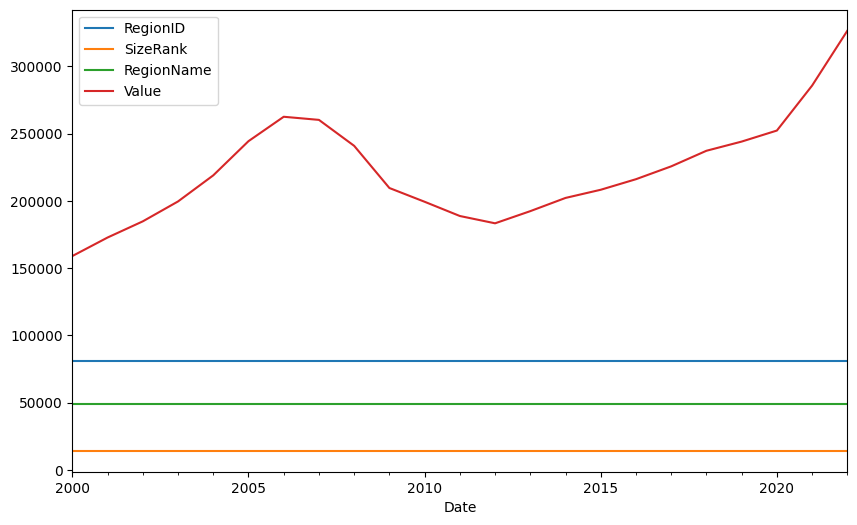

In [48]:
#Plot a line graph with each of the states as a separate line.
yearly_data.plot(figsize=(10, 6))

Tableau

In [ ]:
https://public.tableau.com/app/profile/trevor.eddie.ogwang/viz/Beltexamogwang/clorepathmap?publish=yes